# Data Collection

This case is to study 4 layers 考虑所有的可能性，算出最优解，看看最优解的形式，以及次最优解是什么样的！

35.97502589225769


(array([  2.,   2.,   0.,   2.,   2.,   6.,   1.,  11.,   4.,  10.,   8.,
         42.,  76.,  82.,  86., 206., 262., 316., 380., 334., 364., 616.,
        388., 426., 370., 300., 490., 324., 640., 462., 356., 310., 330.,
        296., 288., 242., 294., 292., 292., 176., 204., 168.,  84., 116.,
        144.,  48.,  48.,  36.,  40.,  24.]),
 array([294180.29831659, 303010.98369762, 311841.66907865, 320672.35445968,
        329503.0398407 , 338333.72522173, 347164.41060276, 355995.09598379,
        364825.78136482, 373656.46674585, 382487.15212688, 391317.8375079 ,
        400148.52288893, 408979.20826996, 417809.89365099, 426640.57903202,
        435471.26441305, 444301.94979408, 453132.63517511, 461963.32055613,
        470794.00593716, 479624.69131819, 488455.37669922, 497286.06208025,
        506116.74746128, 514947.43284231, 523778.11822333, 532608.80360436,
        541439.48898539, 550270.17436642, 559100.85974745, 567931.54512848,
        576762.23050951, 585592.91589053, 594423.6

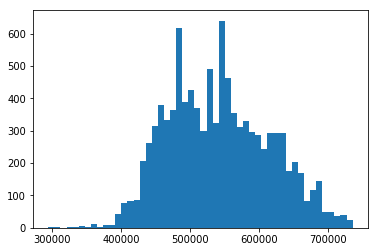

In [2]:
from math import*
import __main__
global PI
import os
import time
PI=float(acos(-1))

import random
import numpy as np
import multiprocessing as mp

import matplotlib.pyplot as plt
%matplotlib inline
from itertools import combinations, permutations
import itertools

rs_number = 123
random.seed(rs_number)

num_layer = 4
data_size = 10**num_layer ;

datasets0 = []
x_range = [0,1,2,3,4,5,6,7,8,9]
for i in itertools.product(x_range, repeat=num_layer):
    datasets0.append(list(i))

datasets = np.reshape(datasets0,(data_size,num_layer))
# print(datasets)

def ssh(num):
#     global datasets
#     arr = np.random.randint(1, 10, size=[data_size, 8])
#     datasets = arr.tolist()
    ply_angle = datasets[num]
    
    bas_ply=[-60, -45, -30, -15, 0, 15, 30, 45, 60, 90]

    AA1=bas_ply[ply_angle[0]]
    AA2=bas_ply[ply_angle[1]]
    AA3=bas_ply[ply_angle[2]]
    AA4=bas_ply[ply_angle[3]]
#     AA5=bas_ply[ply_angle[4]]
#     AA6=bas_ply[ply_angle[5]]
#     AA7=bas_ply[ply_angle[6]]
#     AA8=bas_ply[ply_angle[7]]

    ### ply stacking sequence###
    # 8 layers
#     AAA=[AA1/180.0*PI,AA2/180.0*PI,AA3/180.0*PI,AA4/180.0*PI,AA5/180.0*PI,AA6/180.0*PI,AA7/180.0*PI,AA8/180.0*PI,AA8/180.0*PI,AA7/180.0*PI,AA6/180.0*PI,AA5/180.0*PI,AA4/180.0*PI,AA3/180.0*PI,AA2/180.0*PI,AA1/180.0*PI]
    # 4 layers
    AAA=[AA1/180.0*PI,AA2/180.0*PI,AA3/180.0*PI,AA4/180.0*PI,AA4/180.0*PI,AA3/180.0*PI,AA2/180.0*PI,AA1/180.0*PI]
    
    
    pi=3.14159265358979

    R=250.0   ##  radius##
    H=510.0   ##  Height##
    td=1.0/num_layer  #layer thickness##
    

    # 8 layers
#     TTT=[-td*8,-td*7,-td*6,-td*5,-td*4,-td*3,-td*2,-td*1,td*0,td*1,td*2,td*3,td*4,td*5,td*6,td*7,td*8]
    # 4 layers
    TTT=[-td*4,-td*3,-td*2,-td*1,td*0,td*1,td*2,td*3,td*4]

    ###material property###

    E1=123550.0  
    E2=8707.9
    G12=5695.0
    miu12=0.31946

    miu21=miu12*E2/E1
    Q11=E1/(1-miu12*miu21)
    Q12=miu21*E1/(1-miu12*miu21)
    Q22=E2/(1-miu12*miu21)
    Q66=G12

    A11=0.0
    A12=0.0
    A22=0.0
    A66=0.0

    D11=0.0
    D12=0.0
    D22=0.0
    D66=0.0

    for i in range(0,num_layer*2):
        A11=A11+(Q11*cos(AAA[i])**4+2*(Q12+2*Q66)*sin(AAA[i])**2*cos(AAA[i])**2+Q22*sin(AAA[i])**4)*(TTT[i+1]-TTT[i])
        A12=A12+((Q11+Q22-4*Q66)*sin(AAA[i])**2*cos(AAA[i])**2+Q12*(sin(AAA[i])**4+cos(AAA[i])**4))*(TTT[i+1]-TTT[i])
        A22=A22+(Q11*sin(AAA[i])**4+2*(Q12+2*Q66)*sin(AAA[i])**2*cos(AAA[i])**2+Q22*cos(AAA[i])**4)*(TTT[i+1]-TTT[i])
        A66=A66+((Q11+Q22-2*Q12-2*Q66)*sin(AAA[i])**2*cos(AAA[i])**2+Q66*(sin(AAA[i])**4+cos(AAA[i])**4))*(TTT[i+1]-TTT[i])
        D11=D11+(Q11*cos(AAA[i])**4+2*(Q12+2*Q66)*sin(AAA[i])**2*cos(AAA[i])**2+Q22*sin(AAA[i])**4)*(TTT[i+1]**3-TTT[i]**3)/3.0
        D12=D12+((Q11+Q22-4*Q66)*sin(AAA[i])**2*cos(AAA[i])**2+Q12*(sin(AAA[i])**4+cos(AAA[i])**4))*(TTT[i+1]**3-TTT[i]**3)/3.0
        D22=D22+(Q11*sin(AAA[i])**4+2*(Q12+2*Q66)*sin(AAA[i])**2*cos(AAA[i])**2+Q22*cos(AAA[i])**4)*(TTT[i+1]**3-TTT[i]**3)/3.0
        D66=D66+((Q11+Q22-2*Q12-2*Q66)*sin(AAA[i])**2*cos(AAA[i])**2+Q66*(sin(AAA[i])**4+cos(AAA[i])**4))*(TTT[i+1]**3-TTT[i]**3)/3.0

    #####bianliang########

    D= 2*R
    L= H

    #xian
    a=[[A11,A12,0],[A12,A22,0],[0,0,A66]]
    b=[[0,0,0],[0,0,0],[0,0,0]]
    d=[[D11,D12,0],[D12,D22,0],[0,0,D66]]

    alpha=PI/L
    beta=2/D

    mm=50
    nn=50
    kmm=0
    knn=0
    kmm11=0
    knn11=0
    F=[[0 for col in range(nn)] for row in range(mm)]
    Fcr=1e16

    for m in range(1,mm+1):
        for n in range(1,nn+1):
            xi11=2*a[0][0]*(m*alpha)**2+2*a[2][2]*(n*beta)**2
            xi12=2*(a[0][1]+a[2][2])*m*alpha*n*beta
            xi13=4*a[0][1]*m*alpha/D-2*b[0][0]*(m*alpha)**3-2*(b[0][1]+2*b[2][2])*m*alpha*(n*beta)**2
            xi22=2*a[1][1]*(n*beta)**2+2*a[2][2]*(m*alpha)**2
            xi23=4*a[1][1]*n*beta/D-2*b[1][1]*(n*beta)**3-2*(b[0][1]+2*b[2][2])*(m*alpha)**2*n*beta
            xi33=4*(d[0][1]+2*d[2][2])*(m*alpha*n*beta)**2+8*a[1][1]/(D**2)\
            +2*d[0][0]*(m*alpha)**4+2*d[1][1]*(n*beta)**4-8*(b[1][1]*(n*beta)**2+b[0][1]*(m*alpha)**2)/D
            xi21=xi12
            xi31=xi13
            xi32=xi23
            det1=xi11*(xi22*xi33-xi32*xi23)-xi12*(xi21*xi33-xi31*xi23)+xi13*(xi21*xi32-xi31*xi22)
            det2=xi11*xi22-xi21*xi12
            Nx=det1/det2/(2*((m*alpha)**2))
            F[m-1][n-1]=Nx*PI*D
            if Fcr>F[m-1][n-1]:
              Fcr=F[m-1][n-1]
              kmm=m
              knn=2*n

    for m in range(1,mm+1):
        xi11=2*a[0][0]*(m*alpha)**2
        xi12=0
        xi13=4*a[0][1]*m*alpha/D-2*b[0][0]*(m*alpha)**3
        xi22=2*a[2][2]*(m*alpha)**2
        xi23=0
        xi33=8*a[1][1]/(D**2)+2*d[0][0]*(m*alpha)**4-8*b[0][1]*(m*alpha)**2/D
        xi21=xi12
        xi31=xi13
        xi32=xi23
        det1=xi11*(xi22*xi33-xi32*xi23)-xi12*(xi21*xi33-xi31*xi23)+xi13*(xi21*xi32-xi31*xi22)
        det2=xi11*xi22-xi21*xi12
        Nx=det1/det2/(2*((m*alpha)**2))
        Fn1=Nx*PI*D
        if Fcr>Fn1:
          Fcr=Fn1
          kmm=m
          knn=1

    return Fcr

# map async parallel 
# pool = mp.Pool(mp.cpu_count())
pool = mp.Pool(processes = 8)

start = time.time()
Fcr = pool.map(ssh, range(data_size))
end = time.time() 
print(end - start) #0.0037827491760253906

results_map = Fcr
# plt.figure()
# plt.hist(results_map,50)
plt.figure()
plt.hist(Fcr,50)


In [4]:
# max_Fcr = max(Fcr)
# print(max_Fcr)
# sort_index_FEM = np.argsort(Fcr)
# print(sort_index_FEM)

# # Fcr.sort()
# # print(Fcr)
# for j in range(24):
#     print(datasets[sort_index_FEM[data_size-1-j]])
# print(datasets[sort_index_FEM[data_size-1]])
# print(datasets[sort_index_FEM[data_size-2]])



# from itertools import combinations
# test_data = {1,2,3,4,5,6,7,8,9,10}
# for i in combinations(test_data, 4):
#     print(i)

# import itertools
# x = [1,2,3,4,5,6,7,8,9,10]
# # [p for p in itertools.product(x, repeat=2)]
# p = itertools.product(x, repeat=2)
# data = []
# for i in itertools.product(x, repeat=2):
#     data.append(i)
    
# print(data)

# from itertools import combinations, permutations

# datasets = []
# x_range = [1,2,3,4,5,6,7,8,9,10]
# j = 0 
# for i in itertools.product(x_range, repeat=2):
#     com_ply = list(i)
# #     print(com_ply)
#     datasets.append(com_ply[:])
    
# data_size = 100;
# print(np.reshape(datasets,(data_size,2)))
               
    

# random_selection = 0

# if random_selection==0:
#     ''' random selection'''
#     datasets = np.random.randint(1, 10, size=[data_size, 2])
# #     data_input = arr.tolist()
# #     datasets = arr
# else:
#     '''latin hypercube sampling'''
    
# print(datasets)

# datasets[1][0]
print(data_size//10*2)

2000


# Data classification and preprocessing

In [66]:
results_map_sort = sorted(results_map) # note that sorted change the sort but didn't change the original one

multi_lable = 0

if multi_lable==1:
# print(results_map_sort)
    num_lable = 10
    # median_value = results_map_sort[data_size//2]
    # print(median_value)
    output_scikit = np.zeros(data_size)
    for i in range(data_size):
        if results_map[i] < results_map_sort[data_size//num_lable]:
            output_scikit[i] = 0
        elif results_map[i] < results_map_sort[data_size//num_lable*2] and results_map[i] >= results_map_sort[data_size//num_lable]:
            output_scikit[i] = 1
        elif results_map[i] < results_map_sort[data_size//num_lable*3] and results_map[i] >= results_map_sort[data_size//num_lable*2]:
            output_scikit[i] = 2
        elif results_map[i] < results_map_sort[data_size//num_lable*4] and results_map[i] >= results_map_sort[data_size//num_lable*3]:
            output_scikit[i] = 3
        elif results_map[i] < results_map_sort[data_size//num_lable*5] and results_map[i] >= results_map_sort[data_size//num_lable*4]:
            output_scikit[i] = 4
        elif results_map[i] < results_map_sort[data_size//num_lable*6] and results_map[i] >= results_map_sort[data_size//num_lable*5]:
            output_scikit[i] = 5
        elif results_map[i] < results_map_sort[data_size//num_lable*7] and results_map[i] >= results_map_sort[data_size//num_lable*6]:
            output_scikit[i] = 6
        elif results_map[i] < results_map_sort[data_size//num_lable*8] and results_map[i] >= results_map_sort[data_size//num_lable*7]:
            output_scikit[i] = 7
        elif results_map[i] < results_map_sort[data_size//num_lable*9] and results_map[i] >= results_map_sort[data_size//num_lable*8]:
            output_scikit[i] = 8
        elif results_map[i] < results_map_sort[data_size//num_lable*10-1] and results_map[i] >= results_map_sort[data_size//num_lable*9]:
            output_scikit[i] = 9
else:
    class_value = results_map_sort[data_size//3*2]
    print(class_value)
    output_scikit = np.zeros(data_size)

    for i in range(data_size):
        if results_map[i] > class_value:
            output_scikit[i] = 1
        else:
            output_scikit[i] = 0
            
            
y_data = output_scikit
# print(y_data[1:1000])

570765.9076537626


# Training by classification 

In [67]:
# scikit-learn MLP training 
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_mldata
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# preprocessing data scale? X is [1,10]
trans_mean = np.mean(datasets)
trans_std = np.std(datasets)

data_scale = 2
if data_scale==0:
    X_data = preprocessing.scale(datasets)
elif data_scale ==1:
    min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
    X_data = min_max_scaler.fit_transform(datasets)
elif data_scale ==2:
    scaler = preprocessing.StandardScaler().fit(datasets) # can be used for the following iteration 
    X_data = scaler.transform(datasets)  

# sgd optimizer 
# mlp = MLPClassifier(solver='sgd', activation='relu',alpha=1e-4, hidden_layer_sizes=(128, 128),
#                     random_state=1, max_iter=10000,verbose=True)

# mlp = MLPClassifier(solver='adam', activation='relu',alpha=1e-4, hidden_layer_sizes=(200,200,200,200,200,200,200),
#                     random_state=1, max_iter=1000,verbose=True,learning_rate = 'adaptive')

mlp = MLPClassifier(solver='adam', activation='relu',alpha=1e-4, hidden_layer_sizes=(128,128),
                    random_state=1, max_iter=1000,verbose=True,learning_rate = 'adaptive')

# lbfgs - very slow 
# mlp = MLPClassifier(solver='lbfgs', activation='relu',alpha=1e-4,hidden_layer_sizes=(100,100),
#                     random_state=1,max_iter=50,verbose=10,learning_rate_init=.1)
# adam 
# mlp = MLPClassifier(solver='adam', activation='relu',alpha=1e-4,hidden_layer_sizes=(100,100),
#                     random_state=1,max_iter=50,verbose=10,learning_rate_init=.1)

# testing and training data 
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2,random_state=rs_number)

# training 
mlp.fit(X_train, y_train) 

#testing
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (train) for %0.1f%% " % (accuracy * 100))

print(mlp.classes_)
# # cross-validation 
# score_cv = cross_val_score(mlp, X_data, y_data,cv=5)  
# print(score_cv)

## tuning hyperparameters 

# 10000 data, [0.84457771 0.854      0.8385     0.845      0.85992996], default
# 10000 data, [0.82908546 0.835      0.8235     0.8185     0.82391196], feature[1,10] normalization 效果一般
# 10000 data, [0.86206897 0.8605     0.8375     0.854      0.8154077 ], feature[0,1] normalization 效果一般
# 10000 data, [0.84457771 0.854      0.8385     0.845      0.85992996], StandardScaler()

/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/jiaxinzhang/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Iteration 1, loss = 0.62155264
Iteration 2, loss = 0.58223595
Iteration 3, loss = 0.54507537
Iteration 4, loss = 0.50665877
Iteration 5, loss = 0.46924949
Iteration 6, loss = 0.43473609
Iteration 7, loss = 0.40457281
Iteration 8, loss = 0.38288135
Iteration 9, loss = 0.36706208
Iteration 10, loss = 0.35277989
Iteration 11, loss = 0.34207756
Iteration 12, loss = 0.33032789
Iteration 13, loss = 0.32290513
Iteration 14, loss = 0.31280108
Iteration 15, loss = 0.30595224
Iteration 16, loss = 0.30263315
Iteration 17, loss = 0.29923337
Iteration 18, loss = 0.28974336
Iteration 19, loss = 0.28741207
Iteration 20, loss = 0.28235503
Iteration 21, loss = 0.27426584
Iteration 22, loss = 0.27373901
Iteration 23, loss = 0.27022459
Iteration 24, loss = 0.26904572
Iteration 25, loss = 0.26243625
Iteration 26, loss = 0.25855450
Iteration 27, loss = 0.25406773
Iteration 28, loss = 0.24983910
Iteration 29, loss = 0.24885028
Iteration 30, loss = 0.24696742
Iteration 31, loss = 0.24190494
Iteration 32, los

# ML rank VS FEM rank

735714.5673680217
[0.00124335 0.99875665]
735714.5673680217
[8.22547630e-04 9.99177452e-01]
735714.5673680217
[0.00139274 0.99860726]
735714.5673680217
[0.00270558 0.99729442]
735714.5673680217
[0.00255709 0.99744291]
735714.5673680217
[8.64564453e-04 9.99135436e-01]
735714.5673680217
[0.00281314 0.99718686]
735714.5673680217
[0.00384935 0.99615065]
732023.7011018816
[1.04559758e-07 9.99999895e-01]
732023.7011018816
[3.45503339e-07 9.99999654e-01]
732023.7011018816
[9.17506472e-07 9.99999082e-01]
732023.7011018816
[0.00459851 0.99540149]
732023.7011018816
[7.99985838e-04 9.99200014e-01]
732023.7011018816
[0.00297313 0.99702687]
732023.7011018816
[1.65487280e-07 9.99999835e-01]
732023.7011018816
[0.00510912 0.99489088]
729337.2867842921
[8.75458293e-07 9.99999125e-01]
729337.2867842921
[2.88336968e-06 9.99997117e-01]
729337.2867842921
[0.00208312 0.99791688]
729337.2867842921
[0.0010199 0.9989801]
729337.2867842921
[8.38338635e-04 9.99161661e-01]
729337.2867842921
[7.11230996e-06 9.9999

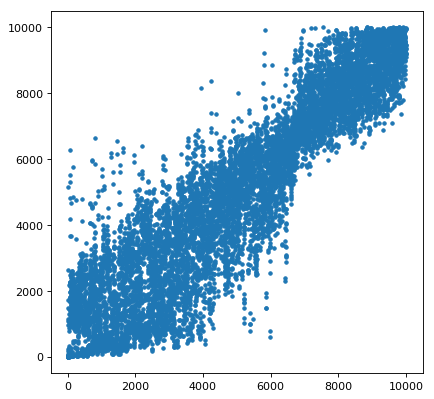

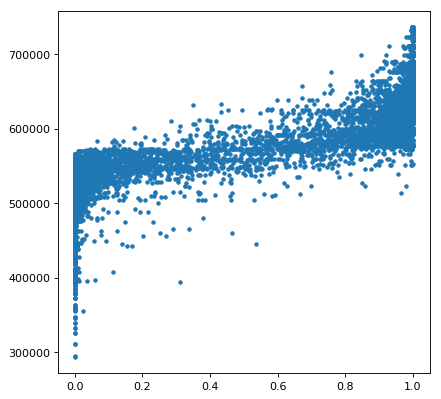

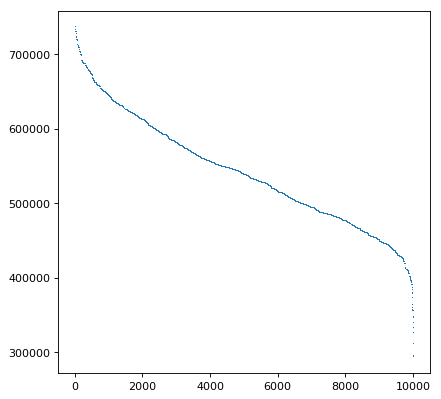

In [68]:
sort_index_FEM = np.argsort(results_map)
probs = mlp.predict_proba(X_data)
sort_index_mlp = np.argsort(probs[:][:,1])

sort_FEM = sort_index_FEM.tolist()
sort_mlp = sort_index_mlp.tolist()

# print(sort_FEM[data_size-20:data_size])
# print(sort_mlp[data_size-20:data_size])

for k in range(100):
    print(results_map[sort_FEM[data_size-1-k]])
    print(probs[sort_FEM[data_size-1-k]])

rank_mlp = []
for j in range(data_size):
    rank_fem = sort_FEM[j]
    rank_mlp0 = sort_mlp.index(rank_fem)
    rank_mlp.append(rank_mlp0)


plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range(data_size),rank_mlp,'.')

# plot, x - fem value, y - probability
# for j in range(data_size):
#     x = results_map[j]
plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot((probs[:][:,1]), results_map,'.')

plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range(data_size),-np.sort(-np.asarray(results_map)),',')

# Stochastic Optimization 

In [ ]:
# multiple loop training but no call FEM data collection 

loop = 10
X_loop = X_data # scale data, 50000
X_ori = datasets # orial data, 50000

for i in range(loop):
    print(i)
    # classification probability 
    probs_all = mlp.predict_proba(X_loop)
    sort_index_mlp = np.argsort(probs_all[:][:,1])

    # top 10% selection 
    top_10 = X_loop[sort_index_mlp[int(data_size*0.9):data_size]]
    top_10_ori = X_ori[sort_index_mlp[int(data_size*0.9):data_size]]
#     print(top_10_ori)

    # random selection 90%
    if random_selection==0:
        ''' random selection'''
        data_random = np.random.randint(1, 10, size=[int(data_size*0.9), 8])
    else:
        '''latin hypercube sampling'''

    X_90_scale = scaler.transform(data_random) 
    X_90_ori = data_random
    X_loop = np.concatenate((X_90_scale, top_10), axis=0)
    X_ori = np.concatenate((X_90_ori, top_10_ori), axis=0)
    

In [ ]:
datasets_test = top_10_ori

def ssh_test(num):
#     global datasets
#     arr = np.random.randint(1, 10, size=[data_size, 8])
#     datasets = arr.tolist()
    ply_angle = datasets_test[num]
    
    bas_ply=[-60, -45, -30, -15, 0, 15, 30, 45, 60, 90]

    AA1=bas_ply[ply_angle[0]]
    AA2=bas_ply[ply_angle[1]]
    AA3=bas_ply[ply_angle[2]]
    AA4=bas_ply[ply_angle[3]]
    AA5=bas_ply[ply_angle[4]]
    AA6=bas_ply[ply_angle[5]]
    AA7=bas_ply[ply_angle[6]]
    AA8=bas_ply[ply_angle[7]]

    ### ply stacking sequence###
    AAA=[AA1/180.0*PI,AA2/180.0*PI,AA3/180.0*PI,AA4/180.0*PI,AA5/180.0*PI,AA6/180.0*PI,AA7/180.0*PI,AA8/180.0*PI,AA8/180.0*PI,AA7/180.0*PI,AA6/180.0*PI,AA5/180.0*PI,AA4/180.0*PI,AA3/180.0*PI,AA2/180.0*PI,AA1/180.0*PI]
    pi=3.14159265358979

    R=250.0   ##  radius##
    H=510.0   ##  Height##
    td=0.125  #layer thickness##

    TTT=[-td*8,-td*7,-td*6,-td*5,-td*4,-td*3,-td*2,-td*1,td*0,td*1,td*2,td*3,td*4,td*5,td*6,td*7,td*8]

    ###material property###

    E1=123550.0  
    E2=8707.9
    G12=5695.0
    miu12=0.31946

    miu21=miu12*E2/E1
    Q11=E1/(1-miu12*miu21)
    Q12=miu21*E1/(1-miu12*miu21)
    Q22=E2/(1-miu12*miu21)
    Q66=G12

    A11=0.0
    A12=0.0
    A22=0.0
    A66=0.0

    D11=0.0
    D12=0.0
    D22=0.0
    D66=0.0

    for i in range(0,16):
        A11=A11+(Q11*cos(AAA[i])**4+2*(Q12+2*Q66)*sin(AAA[i])**2*cos(AAA[i])**2+Q22*sin(AAA[i])**4)*(TTT[i+1]-TTT[i])
        A12=A12+((Q11+Q22-4*Q66)*sin(AAA[i])**2*cos(AAA[i])**2+Q12*(sin(AAA[i])**4+cos(AAA[i])**4))*(TTT[i+1]-TTT[i])
        A22=A22+(Q11*sin(AAA[i])**4+2*(Q12+2*Q66)*sin(AAA[i])**2*cos(AAA[i])**2+Q22*cos(AAA[i])**4)*(TTT[i+1]-TTT[i])
        A66=A66+((Q11+Q22-2*Q12-2*Q66)*sin(AAA[i])**2*cos(AAA[i])**2+Q66*(sin(AAA[i])**4+cos(AAA[i])**4))*(TTT[i+1]-TTT[i])
        D11=D11+(Q11*cos(AAA[i])**4+2*(Q12+2*Q66)*sin(AAA[i])**2*cos(AAA[i])**2+Q22*sin(AAA[i])**4)*(TTT[i+1]**3-TTT[i]**3)/3.0
        D12=D12+((Q11+Q22-4*Q66)*sin(AAA[i])**2*cos(AAA[i])**2+Q12*(sin(AAA[i])**4+cos(AAA[i])**4))*(TTT[i+1]**3-TTT[i]**3)/3.0
        D22=D22+(Q11*sin(AAA[i])**4+2*(Q12+2*Q66)*sin(AAA[i])**2*cos(AAA[i])**2+Q22*cos(AAA[i])**4)*(TTT[i+1]**3-TTT[i]**3)/3.0
        D66=D66+((Q11+Q22-2*Q12-2*Q66)*sin(AAA[i])**2*cos(AAA[i])**2+Q66*(sin(AAA[i])**4+cos(AAA[i])**4))*(TTT[i+1]**3-TTT[i]**3)/3.0

    #####bianliang########

    D= 2*R
    L= H

    #xian
    a=[[A11,A12,0],[A12,A22,0],[0,0,A66]]
    b=[[0,0,0],[0,0,0],[0,0,0]]
    d=[[D11,D12,0],[D12,D22,0],[0,0,D66]]

    alpha=PI/L
    beta=2/D

    mm=50
    nn=50
    kmm=0
    knn=0
    kmm11=0
    knn11=0
    F=[[0 for col in range(nn)] for row in range(mm)]
    Fcr=1e16

    for m in range(1,mm+1):
        for n in range(1,nn+1):
            xi11=2*a[0][0]*(m*alpha)**2+2*a[2][2]*(n*beta)**2
            xi12=2*(a[0][1]+a[2][2])*m*alpha*n*beta
            xi13=4*a[0][1]*m*alpha/D-2*b[0][0]*(m*alpha)**3-2*(b[0][1]+2*b[2][2])*m*alpha*(n*beta)**2
            xi22=2*a[1][1]*(n*beta)**2+2*a[2][2]*(m*alpha)**2
            xi23=4*a[1][1]*n*beta/D-2*b[1][1]*(n*beta)**3-2*(b[0][1]+2*b[2][2])*(m*alpha)**2*n*beta
            xi33=4*(d[0][1]+2*d[2][2])*(m*alpha*n*beta)**2+8*a[1][1]/(D**2)\
            +2*d[0][0]*(m*alpha)**4+2*d[1][1]*(n*beta)**4-8*(b[1][1]*(n*beta)**2+b[0][1]*(m*alpha)**2)/D
            xi21=xi12
            xi31=xi13
            xi32=xi23
            det1=xi11*(xi22*xi33-xi32*xi23)-xi12*(xi21*xi33-xi31*xi23)+xi13*(xi21*xi32-xi31*xi22)
            det2=xi11*xi22-xi21*xi12
            Nx=det1/det2/(2*((m*alpha)**2))
            F[m-1][n-1]=Nx*PI*D
            if Fcr>F[m-1][n-1]:
              Fcr=F[m-1][n-1]
              kmm=m
              knn=2*n

    for m in range(1,mm+1):
        xi11=2*a[0][0]*(m*alpha)**2
        xi12=0
        xi13=4*a[0][1]*m*alpha/D-2*b[0][0]*(m*alpha)**3
        xi22=2*a[2][2]*(m*alpha)**2
        xi23=0
        xi33=8*a[1][1]/(D**2)+2*d[0][0]*(m*alpha)**4-8*b[0][1]*(m*alpha)**2/D
        xi21=xi12
        xi31=xi13
        xi32=xi23
        det1=xi11*(xi22*xi33-xi32*xi23)-xi12*(xi21*xi33-xi31*xi23)+xi13*(xi21*xi32-xi31*xi22)
        det2=xi11*xi22-xi21*xi12
        Nx=det1/det2/(2*((m*alpha)**2))
        Fn1=Nx*PI*D
        if Fcr>Fn1:
          Fcr=Fn1
          kmm=m
          knn=1

    return Fcr

In [ ]:
# pool = mp.Pool(processes = 8)
# out_opt_value = pool.map(ssh_test, range(int(data_size*0.1)))
# print(out_opt_value)
# plt.figure()
# plt.hist(out_opt_value)

out_opt_proba = mlp.predict_proba(top_10)
print(out_opt_proba[:][:,1])
plt.figure()
plt.hist(out_opt_proba[:][:,1])


plt.figure()
plt.hist(results_map)
# print(out_opt_value)
# print(out_opt_proba[:][:,1])
# print(np.shape(datasets))

# print(out_opt_value)
print(np.mean(out_opt_value))
print(np.std(out_opt_value))
print(min(out_opt_value))
print(max(out_opt_value))

In [ ]:
print(max(results_map))
print(np.mean(results_map))
print(np.std(results_map))
